In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [7]:
# load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
y = y.reshape([150,1])

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # initialize weights randomly
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        
        # initialize biases to 0
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))
    
    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # feedforward
            layer1 = X.dot(self.weights1) + self.bias1
            activation1 = sigmoid(layer1)
            layer2 = activation1.dot(self.weights2) + self.bias2
            activation2 = sigmoid(layer2)
            
            # backpropagation
            error = activation2 - y
            d_weights2 = activation1.T.dot(error * sigmoid_derivative(layer2))
            d_bias2 = np.sum(error * sigmoid_derivative(layer2), axis=0, keepdims=True)
            error_hidden = error.dot(self.weights2.T) * sigmoid_derivative(layer1)
            d_weights1 = X.T.dot(error_hidden)
            d_bias1 = np.sum(error_hidden, axis=0, keepdims=True)
            
            # update weights and biases
            self.weights2 -= self.learning_rate * d_weights2
            self.bias2 -= self.learning_rate * d_bias2
            self.weights1 -= self.learning_rate * d_weights1
            self.bias1 -= self.learning_rate * d_bias1
#Prediction    
    def predict(self, X):
        layer1 = X.dot(self.weights1) + self.bias1
        activation1 = sigmoid(layer1)
        layer2 = activation1.dot(self.weights2) + self.bias2
        activation2 = sigmoid(layer2)
        return (activation2 > 0.5).astype(int)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# create an instance of the MLP class
mlp = MLP(input_size=2, hidden_size=7, output_size=1)
# train the MLP on the training data
mlp.fit(X_train, y_train)
# make predictions on the test data
y_pred = mlp.predict(X_test)

In [10]:
# evaluate the accuracy of the MLP
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


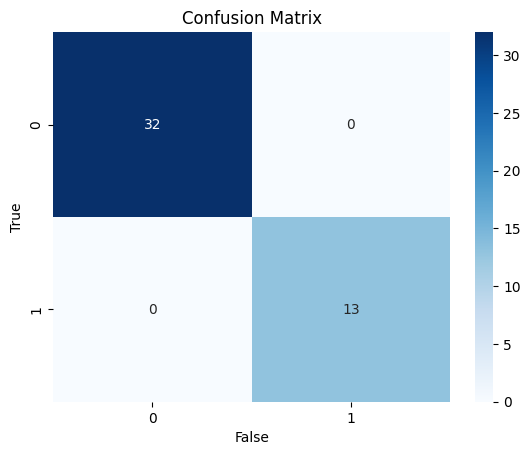

In [11]:
# Calculate confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred) 
  
sns.heatmap(conf_matrix, annot = True, cmap= 'Blues') 
plt.ylabel('True') 
plt.xlabel('False') 
plt.title('Confusion Matrix') 
plt.show()